<a href="https://colab.research.google.com/github/QusaiALBahri/Uploaded-from-colab/blob/main/OneDay_Data_Analysis_Workshop_Pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 ورشة تحليل البيانات باستخدام بايثون (Google Colab) — النسخة المشروحة
**المدة:** يوم واحد (10:00 → 15:00)  
**المستهدف:** متدربون غير متخصصين يرغبون بإتقان عملي من الصفر حتى اتخاذ القرار.


## 📊 مقدمة موجزة
تحليل البيانات أصبح عنصرًا أساسيًا في نجاح الأعمال والمنظمات؛ يساعد على فهم الواقع، اكتشاف الأنماط، والتنبؤ بالاتجاهات لاتخاذ قرارات أدق. سنستخدم **Pandas** لإدارة البيانات و**Matplotlib** للتصور. اخترنا **Python عبر Google Colab** لأنها مجانية، سهلة، ومستخدمة على نطاق مهني واسع.


## 🎯 مخرجات التعلّم
- استيراد وتنظيف البيانات (CSV).  
- تنفيذ تحليل وصفي ورسوم بيانية واضحة.  
- استخدام GroupBy وPivot لاستخلاص مؤشرات.  
- صياغة توصيات عملية تدعم اتخاذ القرار.


## 🕙 الأجندة
- 10:00–10:30: مقدمة وتهيئة البيئة  
- 10:30–11:30: قراءة البيانات واستكشافها  
- 11:30–12:30: تنظيف البيانات وتحويل الأنواع  
- 12:30–13:00: استراحة  
- 13:00–14:00: تحليل وصفي ورسوم  
- 14:00–14:45: GroupBy/Pivot → من التحليل إلى قرار  
- 14:45–15:00: مشروع مصغّر + ختام


## 1) التهيئة وبدء العمل
**المفهوم:** اختبار بيئة Colab قبل أي شيء.  
**لماذا نحتاجه؟** مثل اختبار الميكروفون قبل بدء العرض؛ إذا نجحت الطباعة فالبيئة جاهزة.  
**كيف يُستخدم؟** نستعمل الدالة المدمجة `print()` لإظهار رسالة.


In [ ]:
print("مرحباً بكم في ورشة تحليل البيانات!")

مرحباً بكم في ورشة تحليل البيانات!


**الناتج المتوقع:** ظهور نفس النص على الشاشة.  
**تنبيه أخطاء محتملة:** إن لم يظهر شيء، اضغط زر التشغيل بجانب الخلية.


### استيراد المكتبات
**المفهوم:** المكتبات هي صناديق أدوات جاهزة.  
**لماذا نحتاجها؟** لتسهيل التعامل مع الجداول والرسم دون بناء كل شيء من الصفر.  
**كيف يُستخدم؟** نستورد `pandas` باسم `pd` و`matplotlib.pyplot` باسم `plt` مرةً واحدة.


In [ ]:
import pandas as pd; import matplotlib.pyplot as plt

**ملاحظة:** إذا ظهرت أخطاء استيراد نادرة، أعد تشغيل البيئة (Runtime → Restart).


## 2) قراءة البيانات واستكشافها
### قراءة ملف CSV
**المفهوم:** CSV هو جدول نصي مفصول بفواصل؛ الشكل الأكثر شيوعًا لحفظ البيانات.  
**لماذا؟** لنتمكن من التحليل يجب أولًا تحميل البيانات إلى **DataFrame** (جدول Pandas).  
**كيف؟** نستعمل `pd.read_csv` ونعاين أول الصفوف بـ`head()` للتأكد أن القراءة صحيحة.


In [ ]:
df = pd.read_csv("sales_data.csv"); df.head()

,OrderID,Date,Customer,City,Product,Category,Units,UnitPrice,Discount,DeliveryDays,Channel
0,ORD-1001,2025-03-23,CUST-2,Irbid,Laptop,Electronics,2,82.61,0.05,1,Online
1,ORD-1002,2025-01-29,CUST-48,Amman,Phone,Electronics,2,47.32,0.09,1,Online
2,ORD-1003,2025-03-17,CUST-3,Amman,Notebook,Stationery,3,40.47,0.18,2,Online
3,ORD-1004,2025-01-28,CUST-33,Madaba,Phone,Electronics,2,55.84,0.12,4,Online
4,ORD-1005,2025-03-13,CUST-46,Madaba,Phone,Electronics,1,52.07,0.09,2,In-Store


**ناتج متوقع:** ظهور أول 5 صفوف.  
**تنبيه:** خطأ **FileNotFoundError** يعني أن المسار غير صحيح أو الملف غير مرفوع.


### فحص الشكل والأنواع
**المفهوم:** معرفة حجم الجدول وأنواع الأعمدة خطوة تشخيصية مبكرة.  
**لماذا؟** تساعدنا على تحديد أعمدة تحتاج تنظيفًا (مثلاً عمود رقمي مخزن كنص).  
**كيف؟** `shape` تُرجع (عدد الصفوف، عدد الأعمدة) و`dtypes` تُظهر نوع كل عمود.


In [ ]:
df.shape, df.dtypes

((200, 11),
 OrderID          object
 Date             object
 Customer         object
 City             object
 Product          object
 Category         object
 Units             int64
 UnitPrice        object
 Discount        float64
 DeliveryDays      int64
 Channel          object
 dtype: object)

**تنبيه:** إذا كان عمود سعري يظهر كـ **object** فغالبًا يحتوي نصوصًا مثل "??".


### معاينة إحصائية سريعة
**المفهوم:** تصوير سريع للبيانات يشبه "أشعة سينية".  
**لماذا؟** لاكتشاف نطاقات غير منطقية أو تباينات كبيرة قبل التحليل العميق.  
**كيف؟** `describe(include="all")` يعطي ملخصًا للأعمدة الرقمية والنصية.


In [ ]:
df.describe(include="all")

,OrderID,Date,Customer,City,Product,Category,Units,UnitPrice,Discount,DeliveryDays,Channel
count,200,200,200,200,200,200,200.000000,200,190.000000,200.000000,200
unique,200,83,50,5,6,3,NaN,190,NaN,NaN,2
top,ORD-1001,2025-02-03,CUST-38,Irbid,Phone,Electronics,NaN,??,NaN,NaN,In-Store
freq,1,7,8,52,37,131,NaN,5,NaN,NaN,108
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.760000,NaN,0.100895,2.465000,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,1.557088,NaN,0.048005,0.955689,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.070000,2.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,0.090000,2.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,0.140000,3.000000,NaN


**ملاحظة:** `describe` لا يعرض القيم الفارغة؛ استخدم `df.isna().sum()` لمعرفتها.


## 3) تنظيف البيانات وتحويل الأنواع
### القيم المفقودة (Missing Values)
**المفهوم:** خلايا بلا بيانات (NaN) قد تُفسد الحسابات والرسوم.  
**لماذا؟** المتوسطات والمخططات قد تصبح مضللة إن تجاهلنا الفراغات.  
**كيف؟** نحصيها لكل عمود لتحديد الإستراتيجية المناسبة (تعويض/حذف).


In [ ]:
df.isna().sum()

,0
OrderID,0
Date,0
Customer,0
City,0
Product,0
Category,0
Units,0
UnitPrice,0
Discount,10
DeliveryDays,0


**تنبيه:** لا تعالج كل الأعمدة بالطريقة نفسها؛ اختر ما يناسب سياق البيانات.


### تحويل النص إلى رقم
**المفهوم:** أعمدة مثل السعر قد تحتوي نصوصًا غير رقمية (مثل "??").  
**لماذا؟** العمليات الحسابية تتطلب أنواعًا رقمية صحيحة.  
**كيف؟** نستعمل `to_numeric` مع `errors="coerce"` لتحويل القيم غير الرقمية إلى NaN.


In [ ]:
#print(df["UnitPrice"])
df["UnitPrice"] = pd.to_numeric(df["UnitPrice"], errors="coerce")
#print(df["UnitPrice"])

0      82.61
1      47.32
2      40.47
3      55.84
4      52.07
       ...  
195    42.49
196    42.69
197    55.19
198    41.64
199    35.99
Name: UnitPrice, Length: 195, dtype: float64
0      82.61
1      47.32
2      40.47
3      55.84
4      52.07
       ...  
195    42.49
196    42.69
197    55.19
198    41.64
199    35.99
Name: UnitPrice, Length: 195, dtype: float64


**تنبيه:** ستزداد قيم NaN بعد التحويل—عالجها فورًا بالتعويض أو الحذف.


### تعويض/حذف المفقود
**المفهوم:** اختيار إستراتيجية واضحة للتعامل مع NaN.  
**لماذا؟** لتفادي تشويه النتائج أو تقليص العينة بشكل مفرط.  
**كيف؟** مثال عملي: ملء الخصم بـ 0 وحذف الصفوف التي لا تصلح للتحليل.


In [ ]:
#print(df["UnitPrice"])
df["Discount"] = df["Discount"].fillna(0); df = df.dropna(subset=["UnitPrice"])
#print(df["UnitPrice"])

0      82.61
1      47.32
2      40.47
3      55.84
4      52.07
       ...  
195    42.49
196    42.69
197    55.19
198    41.64
199    35.99
Name: UnitPrice, Length: 195, dtype: float64
0      82.61
1      47.32
2      40.47
3      55.84
4      52.07
       ...  
195    42.49
196    42.69
197    55.19
198    41.64
199    35.99
Name: UnitPrice, Length: 195, dtype: float64


**تنبيه:** البدائل تشمل التعويض بالمتوسط/الوسيط حسب طبيعة العمود.


### تحويل التاريخ
**المفهوم:** التعامل مع التواريخ كتواريخ فعلية (datetime) لتمكين التحليل الزمني.  
**لماذا؟** التجميع الزمني والرسم الخطي يتطلبان نوع تاريخ صحيح.  
**كيف؟** نستخدم `to_datetime` مع معالجة الأخطاء.


In [ ]:
#print(df["Date"])
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
#print(df["Date"])

0      2025-03-23
1      2025-01-29
2      2025-03-17
3      2025-01-28
4      2025-03-13
          ...    
195    2025-03-02
196    2025-03-27
197    2025-03-30
198    2025-02-28
199    2025-01-15
Name: Date, Length: 195, dtype: object
0     2025-03-23
1     2025-01-29
2     2025-03-17
3     2025-01-28
4     2025-03-13
         ...    
195   2025-03-02
196   2025-03-27
197   2025-03-30
198   2025-02-28
199   2025-01-15
Name: Date, Length: 195, dtype: datetime64[ns]


**تنبيه:** القيم غير الصالحة تصبح **NaT**؛ احذفها أو أصلح المصدر إن أمكن.


### تنظيف النصوص وإزالة التكرارات
**المفهوم:** توحيد القيم النصية ومنع تكرار الصفوف.  
**لماذا؟** المسافات الزائدة تعطي فروعًا وهمية، والتكرارات تضخم الأرقام.  
**كيف؟** نزيل المسافات ونسقط الصفوف المكررة حسب مفتاح فريد.


In [ ]:
#print(df["City"])
df["City"] = df["City"].str.strip(); df = df.drop_duplicates(subset=["OrderID"])
#print(df["City"])

0       Irbid
1       Amman
2       Amman
3      Madaba
4      Madaba
        ...  
195     Irbid
196     Irbid
197     Aqaba
198     Irbid
199     Amman
Name: City, Length: 195, dtype: object
0       Irbid
1       Amman
2       Amman
3      Madaba
4      Madaba
        ...  
195     Irbid
196     Irbid
197     Aqaba
198     Irbid
199     Amman
Name: City, Length: 195, dtype: object


**تنبيه:** تأكد أن `OrderID` هو المعرّف الفريد الصحيح قبل الحذف.


## 4) إنشاء حقول ومؤشرات
### الإيراد (Revenue)
**المفهوم:** قيمة الطلب بعد تطبيق الخصم.  
**لماذا؟** هو المؤشر الأساسي لمعظم التحليلات.  
**كيف؟** نضرب عدد الوحدات في السعر ونطرح الخصم.


In [ ]:
df["Revenue"] = df["Units"] * df["UnitPrice"] * (1 - df["Discount"]) # REMEMBER EXCEL ?
#print(df["Revenue"])

0      156.9590
1       86.1224
2       99.5562
3       98.2784
4       47.3837
         ...   
195    118.5471
196    155.3916
197     89.4078
198     37.8924
199    122.3660
Name: Revenue, Length: 195, dtype: float64


**تنبيه:** تأكد أن `Units` و`UnitPrice` أرقام لا نصوص.


### متوسط قيمة الطلب (AOV)
**المفهوم:** متوسط الإيراد لكل طلب؛ مؤشر جودة الصفقة الواحدة.  
**لماذا؟** يقيس عائدية الطلب النموذجي ويساعد في مقارنة القنوات/المدن.  
**كيف؟** نأخذ المتوسط الحسابي لعمود `Revenue`.


In [ ]:
df["Revenue"].mean()
#print(df["Revenue"].mean())

np.float64(123.82571743589745)

**تنبيه:** قارن المتوسط بالوسيط عند وجود قيم شاذة كبيرة.


### ملخص وصفي للأعمدة المهمة
**المفهوم:** مراجعة سريعة لنطاقات وحدود المؤشرات الرئيسية.  
**لماذا؟** لاكتشاف خصومات غير منطقية أو أسعار خارجة عن النطاق.  
**كيف؟** نستعرض `describe` لأهم الأعمدة الرقمية.


In [ ]:
df[["Units","UnitPrice","Discount","Revenue"]].describe()


**تنبيه:** راقب الحد الأقصى/الأدنى غير المنطقي (خصم > 0.9 مثلًا).


## 5) التصور البياني (Matplotlib)
### توزيع الإيرادات (Histogram)
**المفهوم:** رسم يوضح مدى انتشار القيم وتكتلها.  
**لماذا؟** لمعرفة إذا كان التوزيع متوازنًا أو منحازًا.  
**كيف؟** نرسم histogram لعمود `Revenue`.


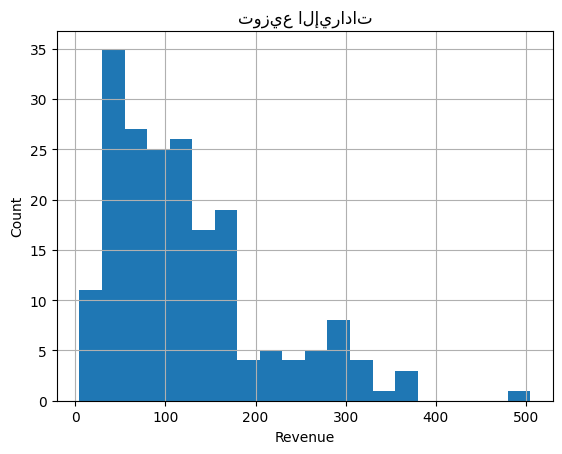

In [ ]:
df["Revenue"].hist(bins=20); plt.title("توزيع الإيرادات"); plt.xlabel("Revenue"); plt.ylabel("Count"); plt.show()


**تنبيه:** تغيير `bins` (مثلاً 10/30) قد يوضح الصورة أكثر أو أقل.


### أفضل المنتجات (Bar Chart)
**المفهوم:** مقارنة إجمالي الإيراد بين المنتجات.  
**لماذا؟** لتحديد المنتجات الأكثر مساهمة في الإيراد.  
**كيف؟** نجمع الإيراد حسب المنتج ثم نرسم شريطًا.


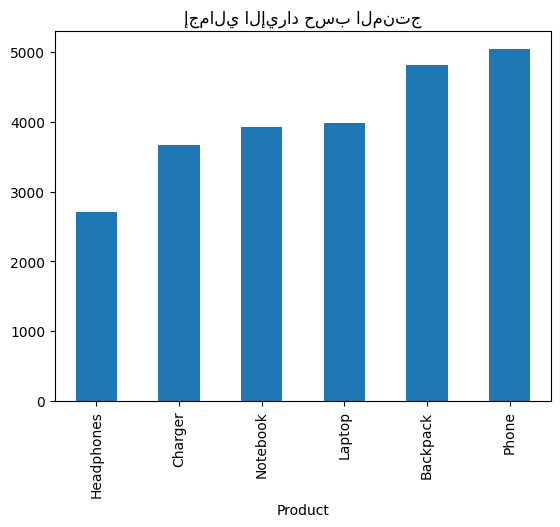

In [ ]:
df.groupby("Product")["Revenue"].sum().sort_values().plot.bar(); plt.title("إجمالي الإيراد حسب المنتج"); plt.show()


**تنبيه:** عند كثرة المنتجات اعرض Top-N فقط قبل الرسم.


### الاتجاه الزمني (Line Chart)
**المفهوم:** مراقبة تغير الإيراد مع مرور الوقت.  
**لماذا؟** لاكتشاف ذروات أو هبوط موسمي.  
**كيف؟** نجمع الإيراد يوميًا ونرسم خطًا.


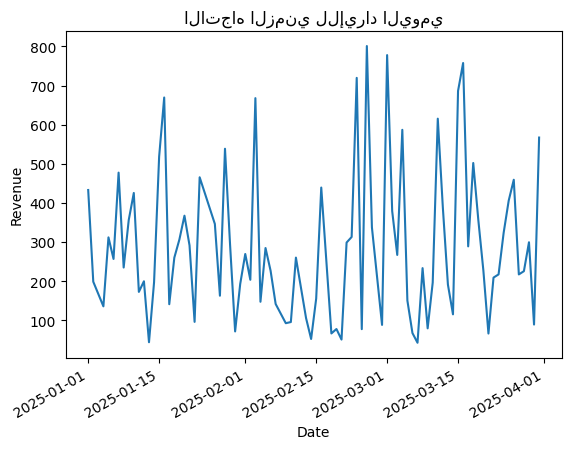

In [ ]:
df.groupby("Date")["Revenue"].sum().plot(); plt.title("الاتجاه الزمني للإيراد اليومي"); plt.xlabel("Date"); plt.ylabel("Revenue"); plt.show()


**تنبيه:** وجود قيم **NaT** في التاريخ يمنع التجميع—نظّف التواريخ أولًا.


## 6) GroupBy و Pivot: نحو القرار
### إيراد حسب القناة
**المفهوم:** مقارنة أداء قناتي Online وIn-Store.  
**لماذا؟** لتوجيه التسويق والعروض حسب الأداء.  
**كيف؟** تجميع الإيراد حسب `Channel` مع ترتيب تنازلي.


In [ ]:
df.groupby("Channel")["Revenue"].sum().sort_values(ascending=False)


,Revenue
Channel,
In-Store,13511.9772
Online,10634.0377


**تنبيه:** اختلاف التهجئة/المسافات قد يخلق قنوات وهمية (مثل "Online ").


### زمن التوصيل حسب المدينة
**المفهوم:** قياس متوسط `DeliveryDays` لتحديد نقاط ضعف لوجستية.  
**لماذا؟** لاتخاذ قرارات تحسين المسارات أو الموردين.  
**كيف؟** متوسط الأيام لكل مدينة بترتيب تنازلي.


In [ ]:
df.groupby("City")["DeliveryDays"].mean().sort_values(ascending=False)


,DeliveryDays
City,
Madaba,2.575758
Aqaba,2.552632
Irbid,2.490196
Amman,2.375000
Zarqa,2.341463


**تنبيه:** تحقق من الطلبات الفردية ذات القيم المتطرفة قبل التعميم.


### Pivot (مدينة × قناة)
**المفهوم:** مصفوفة تلخص الإيراد لكل تقاطع مدينة/قناة.  
**لماذا؟** للكشف عن فرص/فجوات توزيع.  
**كيف؟** إنشاء Pivot مع `fill_value=0` لتجنب الفراغات.


In [ ]:
import pandas as pd; pd.pivot_table(df, values="Revenue", index="City", columns="Channel", aggfunc="sum", fill_value=0)


Channel,In-Store,Online
City,,
Amman,1996.4938,3002.1801
Aqaba,1760.3764,2158.0667
Irbid,3905.7305,1908.6811
Madaba,2610.1590,1775.9801
Zarqa,3239.2175,1789.1297


**تنبيه:** إن كانت المخرجات كبيرة، ركّز على أعلى وأدنى خلايا لاتخاذ قرار.


### أفضل العملاء
**المفهوم:** تحديد أعلى العملاء إيرادًا.  
**لماذا؟** لاستهداف برامج الولاء والعروض الخاصة.  
**كيف؟** تجميع الإيراد حسب `Customer` واختيار أعلى 5.


In [ ]:
df.groupby("Customer")["Revenue"].sum().sort_values(ascending=False).head(5)


,Revenue
Customer,
CUST-23,1021.4276
CUST-47,1020.6387
CUST-35,1012.5015
CUST-16,992.0557
CUST-2,947.0560


**تنبيه:** إن تكررت هويات العملاء بمعرّفات مختلفة، ستحتاج لتوحيد الهوية (خارج نطاق الجلسة).


## 7) من Insight إلى قرار
**المفهوم:** تحويل النتائج إلى فعل واضح قابل للقياس.  
**لماذا؟** لأن قيمة التحليل تظهر عند اتخاذ قرارات عملية.  
**كيف؟** استخرج مؤشرين رئيسيين وصِغ قرارًا مختصرًا يحدد ماذا/لماذا/متى.


In [ ]:
top_prod = df.groupby("Product")["Revenue"].sum().idxmax(); best_channel = df.groupby("Channel")["Revenue"].sum().idxmax(); print(top_prod, best_channel)


Phone In-Store


**مثال قرار:** زيادة مخزون المنتج الأعلى إيرادًا في القناة الأفضل خلال 30 يومًا وقياس AOV أسبوعيًا.  
**تنبيه:** لا تعتمد على مؤشر واحد—ادعم القرار بأكثر من دليل.


## 8) المشروع المصغّر (15 دقيقة)
**المهمة:**  
1) اختر محورًا (منتج/مدينة/قناة).  
2) أظهر مؤشرين رقميين + رسم واحد.  
3) اكتب توصية عملية من سطرين (ماذا/لماذا/متى).  
**نموذج تسليم:** Insight + Chart + Decision.
